In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [216]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

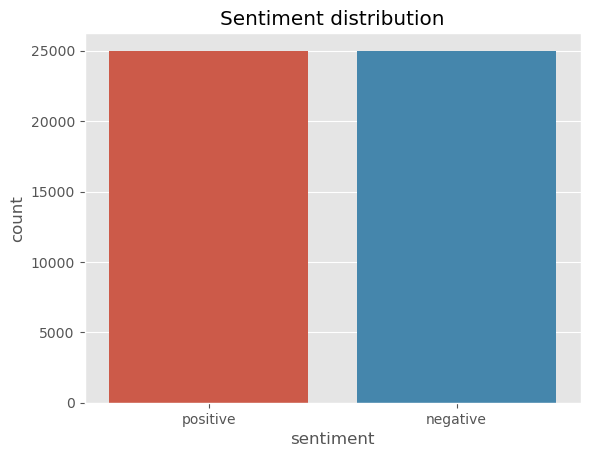

In [218]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [219]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [220]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [221]:
df['word count'] = df['review'].apply(no_of_words)

In [222]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


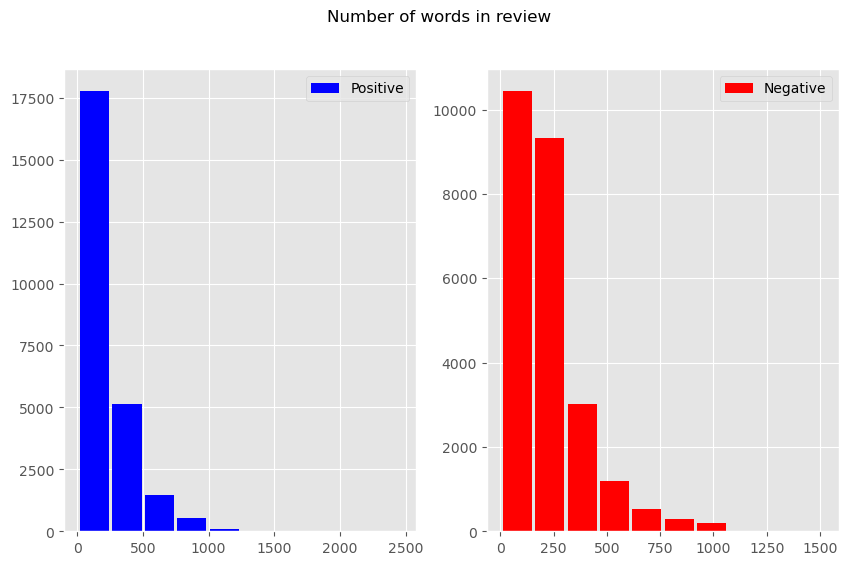

In [223]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

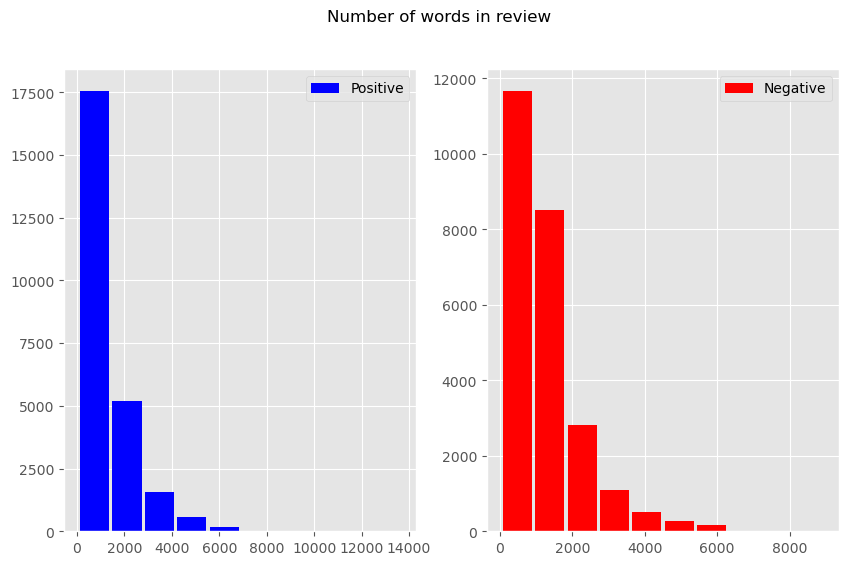

In [224]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [225]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

In [226]:
df.head()


,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [227]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [228]:
df.review = df['review'].apply(data_processing)

In [229]:
df = df.drop_duplicates('review')

In [230]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [231]:
df.review = df['review'].apply(lambda x: stemming(x))

In [232]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


In [233]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


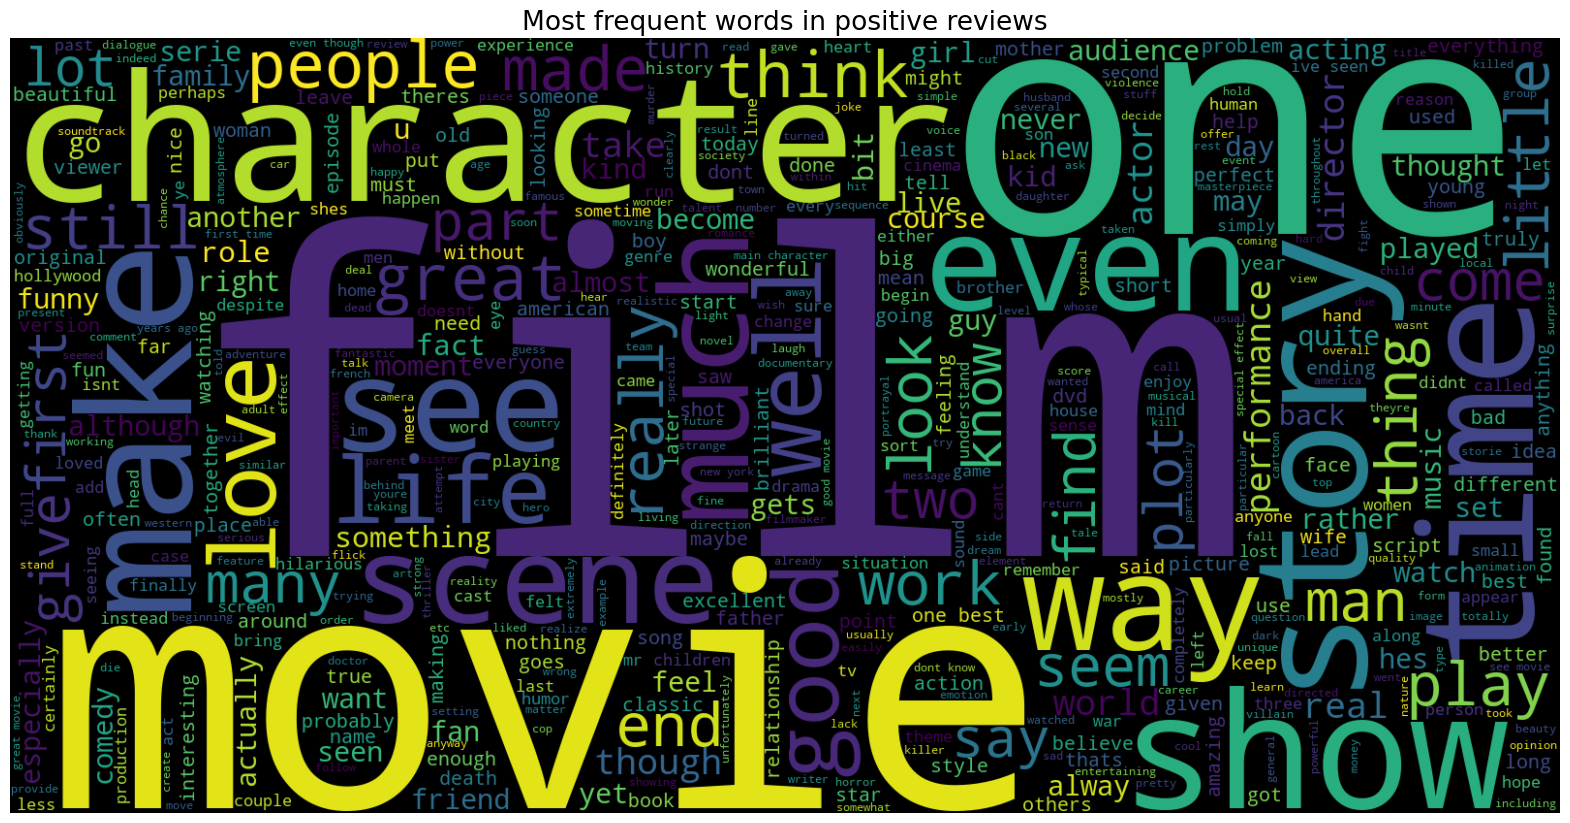

In [234]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [235]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [236]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


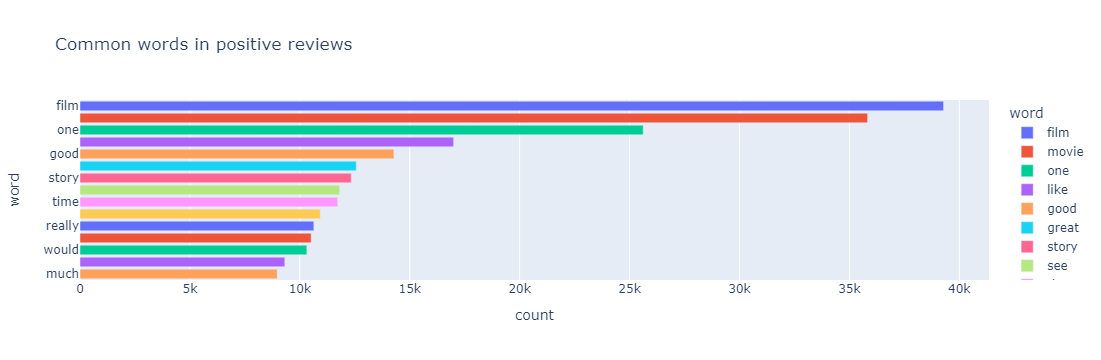

In [237]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')


In [238]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


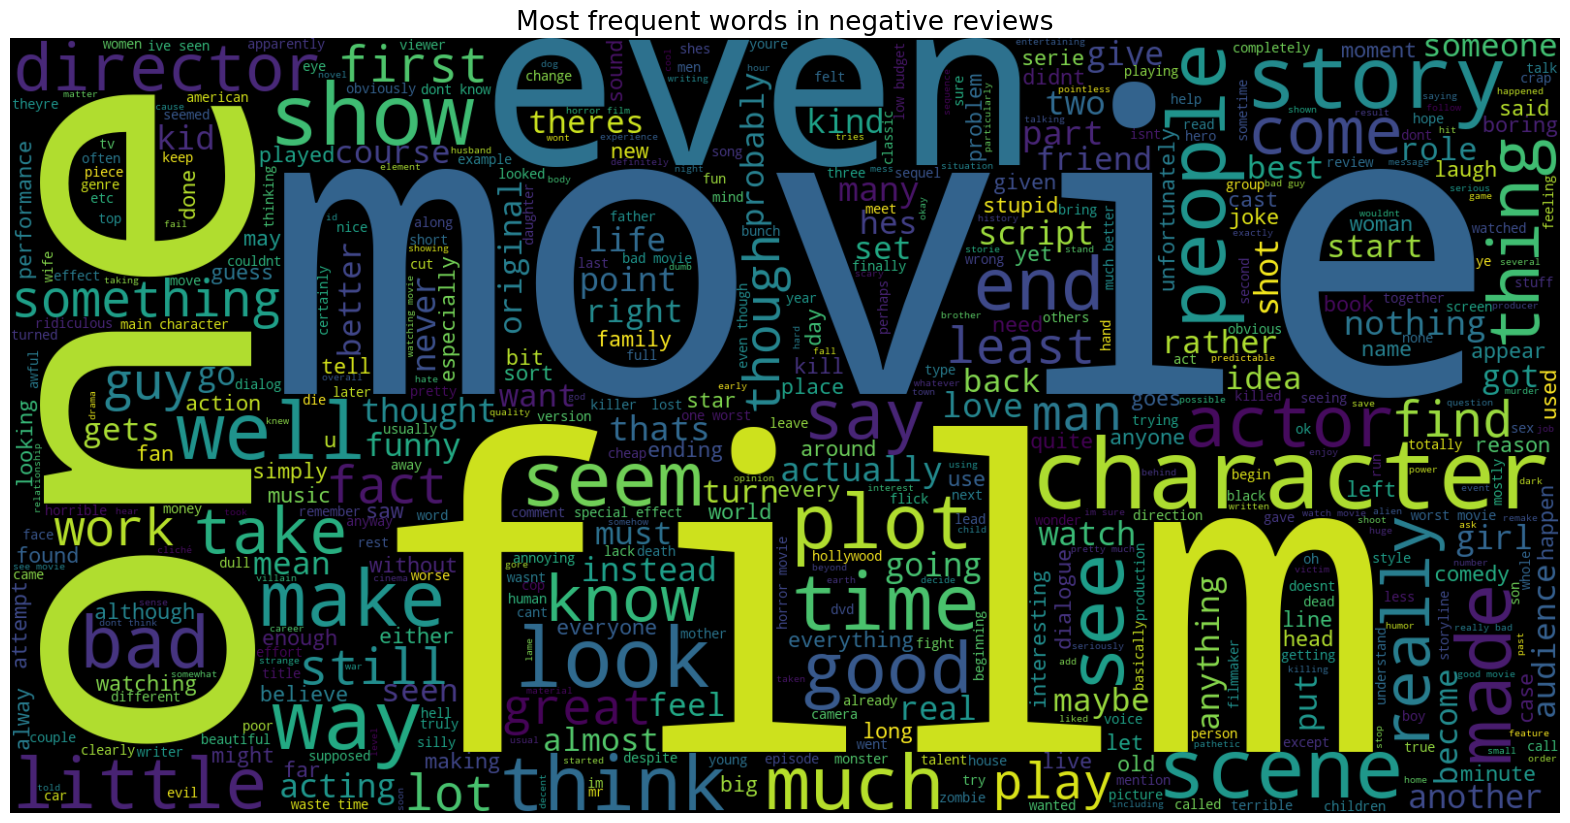

In [239]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [240]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [241]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


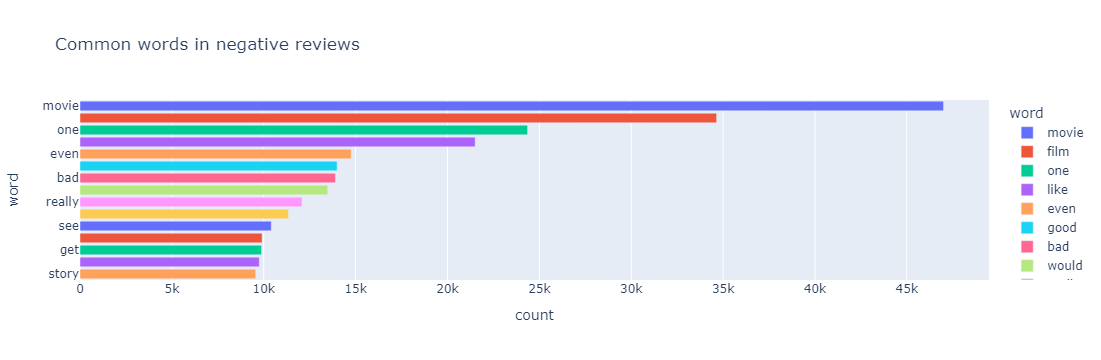

In [242]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [244]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], 
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['sentiment']
                                                   )

In [245]:
X_train.shape, X_test.shape

((39662,), (9916,))

In [246]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [247]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [248]:
y_pred = clf.predict(X_test)

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.91      0.90      4977
           2       0.90      0.89      0.90      4939

    accuracy                           0.90      9916
   macro avg       0.90      0.90      0.90      9916
weighted avg       0.90      0.90      0.90      9916



In [250]:
!pip install mlxtend

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

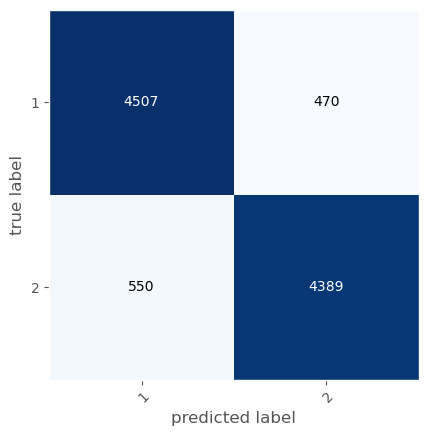

In [251]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [252]:
svc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Support Vector Classification:{:.2f}%".format(svc_accuracy*100))

Accuracy for Support Vector Classification:89.71%


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [254]:
logreg_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

In [255]:
logreg_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [256]:
logreg_y_pred = logreg_clf.predict(X_test)

In [257]:
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print("Accuracy for Logistic Regression: {:.2f}%".format(logreg_accuracy*100))

Accuracy for Logistic Regression: 89.01%


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

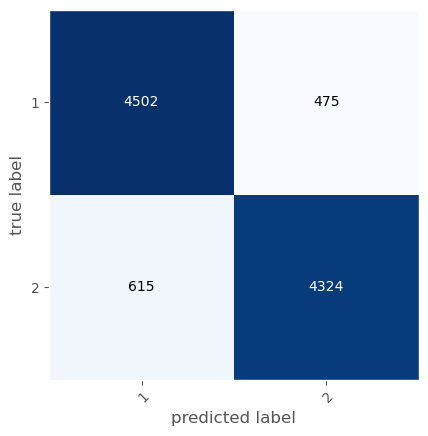

In [258]:
cm = confusion_matrix(y_test, logreg_y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [259]:
from sklearn.naive_bayes import MultinomialNB

In [260]:
nb_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [261]:
nb_clf.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [262]:
nb_y_pred = nb_clf.predict(X_test)

In [263]:
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("Accuracy for Naive Bayes: {:.2f}%".format( nb_accuracy* 100))

Accuracy for Naive Bayes: 86.84%


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

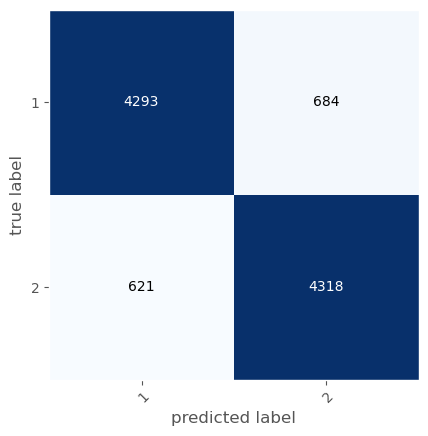

In [264]:
cm = confusion_matrix(y_test, nb_y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Define individual models
logreg_model = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])
nb_model = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
svm_model = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

# Train individual models
logreg_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [266]:
# Make predictions using individual models
logreg_pred = logreg_model.predict(X_test)
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

In [267]:
hybrid_pred = []
for logreg, nb, svm in zip(logreg_pred, nb_pred, svm_pred):
    votes = [logreg, nb, svm]
    hybrid_pred.append(max(set(votes), key=votes.count))

Accuracy for Hybrid Model: 0.8994554255748286
Confusion Matrix for Hybrid Model:


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

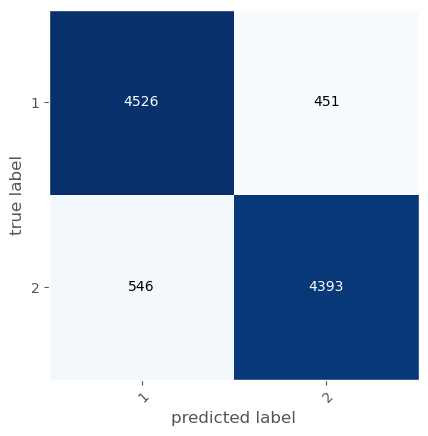

In [268]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy for the hybrid model
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Accuracy for Hybrid Model:", hybrid_accuracy)

# Calculate confusion matrix for the hybrid model
hybrid_conf_matrix = confusion_matrix(y_test, hybrid_pred)
print("Confusion Matrix for Hybrid Model:")
cm = confusion_matrix(y_test, hybrid_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)


In [269]:
import pickle

pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))

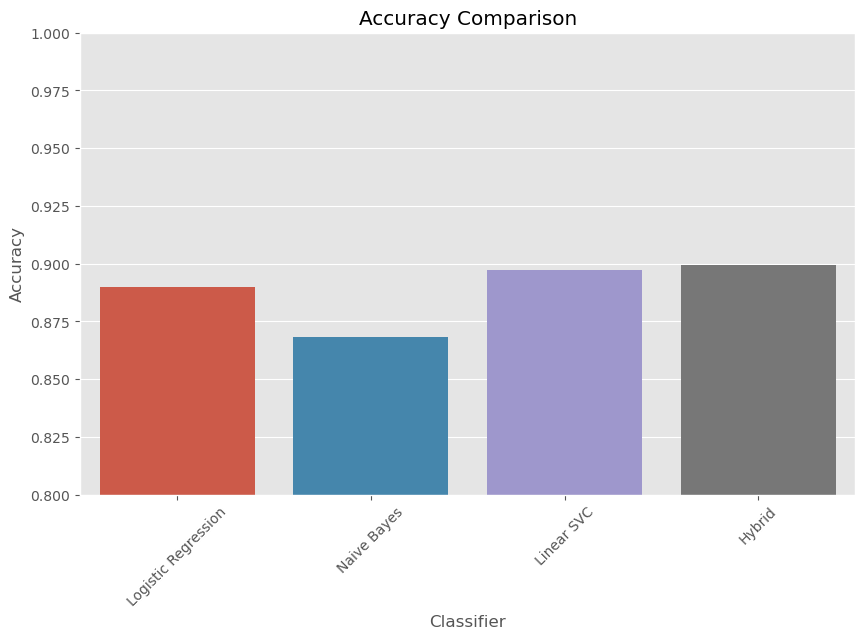

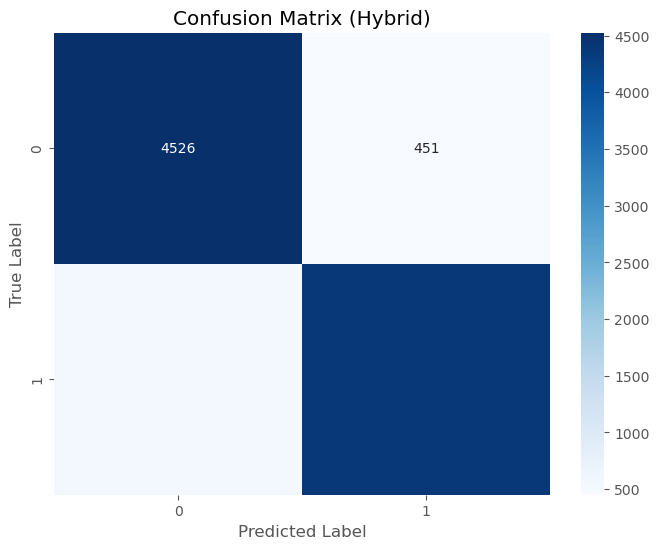

Classification Report (Hybrid):
              precision    recall  f1-score   support

           1       0.89      0.91      0.90      4977
           2       0.91      0.89      0.90      4939

    accuracy                           0.90      9916
   macro avg       0.90      0.90      0.90      9916
weighted avg       0.90      0.90      0.90      9916



In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy of individual classifiers
logreg_accuracy = accuracy_score(y_test, logreg_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Calculate accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, hybrid_pred)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['Logistic Regression', 'Naive Bayes', 'Linear SVC', 'Hybrid'],
            y=[logreg_accuracy, nb_accuracy, svm_accuracy, ensemble_accuracy])
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plot confusion matrix for ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,hybrid_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix (Hybrid)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report for ensemble model
print("Classification Report (Hybrid):")
print(classification_report(y_test, hybrid_pred))
